In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(10884, 30)


,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [3]:
df.describe()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,10884.000000,1.088400e+04
mean,1.797868,1.779677,528.558560,3.062018,0.884693,7.423649,0.722345,0.172639,0.712422,0.750276,0.062201,0.048144,0.124495,0.032157,0.045296,7075.270764,3.670939e+04,257.493025,2.855947e+04
std,0.807328,0.832231,930.460935,2.390430,0.559457,7.670543,0.698966,0.377952,0.842667,0.432873,0.241532,0.214080,0.330160,0.176426,0.207962,17269.507644,5.589578e+04,1247.938097,1.183249e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,510.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,275000.000000,1.500000e+06,40000.000000,1.234568e+08


# EDA

## Missing values

In [4]:
df.isnull().sum()

bedroom                 0
bathrooms               0
area                    0
furnishing              0
avalable_for           30
address                 0
floor_number            0
facing                  0
floor_type              0
gate_community          0
corner_pro              0
parking                 0
wheelchairadption    8940
petfacility          8458
aggDur                  0
noticeDur               0
lightbill               0
powerbackup             0
propertyage             0
no_room                 0
pooja_room              0
study_room              0
others                  0
servant_room            0
store_room              0
maintenance_amt         0
brok_amt                0
deposit_amt             0
mnt_amt                 0
rent                    0
dtype: int64

## Target Variable

In [5]:
target = 'rent'

In [6]:
df.sort_values(by = [target], ascending = False).head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
1834,2,2,0.0,Furnished,All,"Diamond Bhalchandra Nagari, Ravet, , Pune, Mah...",3,South-West,Vitrified,Yes,...,0,0,0,0,0,0,0,50000,0.0,123456789.0
8096,4,5,0.0,Semifurnished,All,"Panchshil Eon Waterfront, Eon Free Zone , , Pu...",1,East,Marble,Yes,...,0,0,0,1,0,0,98000,300000,0.0,98000.0
4087,4,4,2400.0,Furnished,Family Only,"Queens Court, Kalyani Nagar, , Pune, Maharashtra",4,North-West,Not provided,No,...,0,0,0,0,0,0,0,0,0.0,95000.0
4423,3,3,2200.0,Furnished,All,"Panchshil Waterfront, Kalyani Nagar, , Pune, M...",9,No Direction,Vitrified,Yes,...,1,1,1,1,0,0,0,0,0.0,95000.0
2966,4,5,2500.0,Furnished,All,"Vascon Marigold, Kalyani Nagar, , Pune, Mahara...",9,North-East,Vitrified,Yes,...,0,0,0,1,0,Maintenance 5000/ ((one time fee,91000,350000,5000.0,91000.0


There is some discrepancy in the first entry as the price is too large

In [7]:
df.drop((df.loc[df['rent'] == max(df['rent'])]).index, inplace = True)

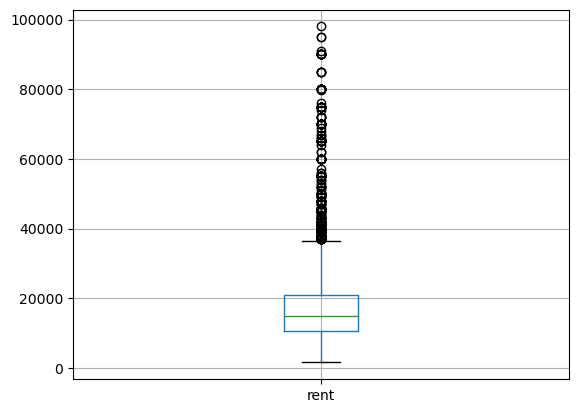

In [8]:
df.boxplot(column = target)
plt.show()

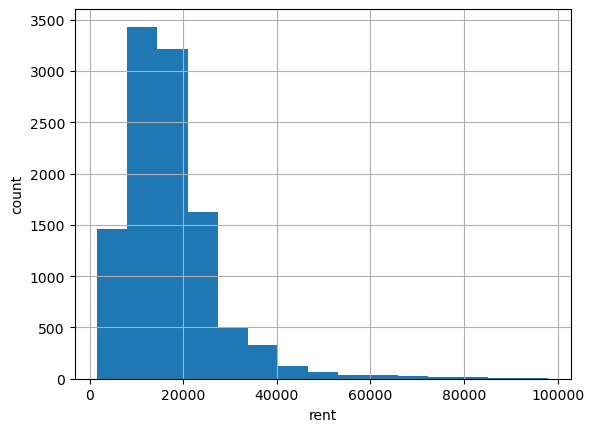

In [9]:
df[target].hist(bins = 15)
plt.xlabel(target)
plt.ylabel('count')
plt.show()

Since distribution is right skewed we can apply a log transformation

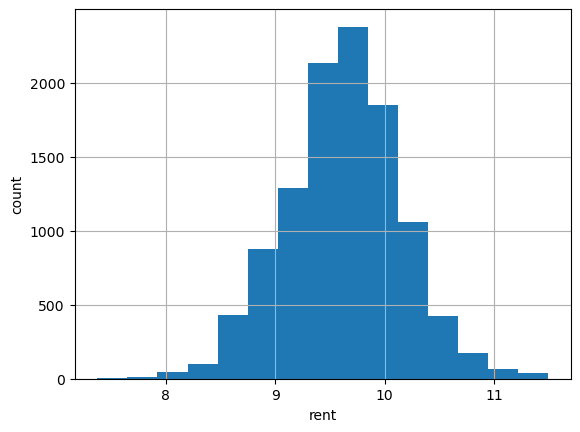

In [10]:
## log transformation

df[target] = np.log(df[target])

df[target].hist(bins = 15)
plt.xlabel(target)
plt.ylabel('count')
plt.show()

## Numerical Features

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != target]

df[num_features].head()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt
0,2,2,1050.0,5,0,11,2,0,2,1,0,0,0,0,0,0,3,0.0
1,2,2,760.0,5,2,11,1,0,2,1,0,0,0,0,0,0,40000,0.0
2,3,3,0.0,1,1,11,1,0,2,0,0,0,1,0,0,23000,60000,1.0
3,1,1,628.0,3,1,11,1,0,0,1,0,0,0,0,0,0,40000,0.0
4,2,2,668.0,6,1,12,1,1,1,1,0,0,0,0,0,0,20,0.0


### Discrete Features

In [12]:
dis_features = [feature for feature in num_features if len(df[feature].unique()) < 20 and feature != target]

print(dis_features)

['bedroom', 'bathrooms', 'floor_number', 'parking', 'noticeDur', 'lightbill', 'powerbackup', 'no_room', 'pooja_room', 'study_room', 'others', 'servant_room', 'store_room']


#### vs Target Variable

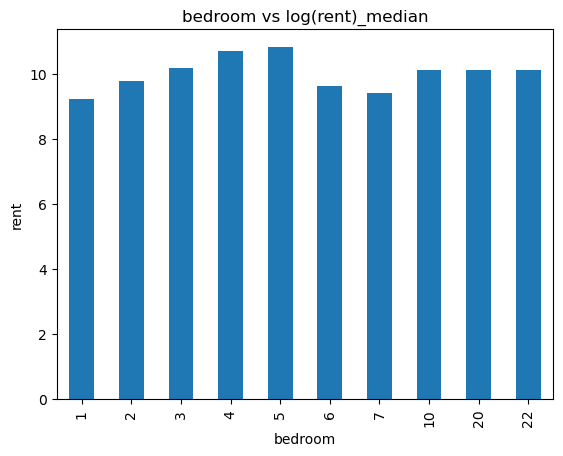

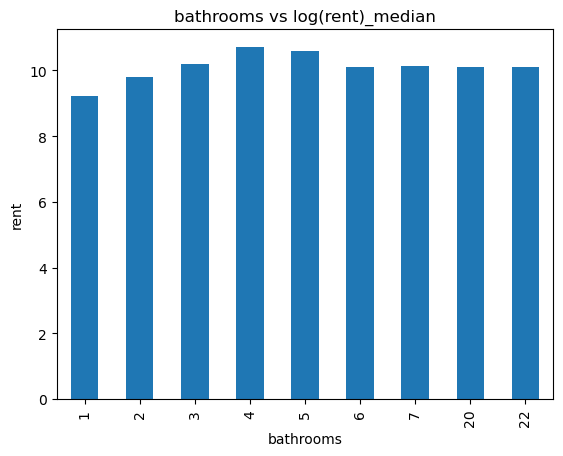

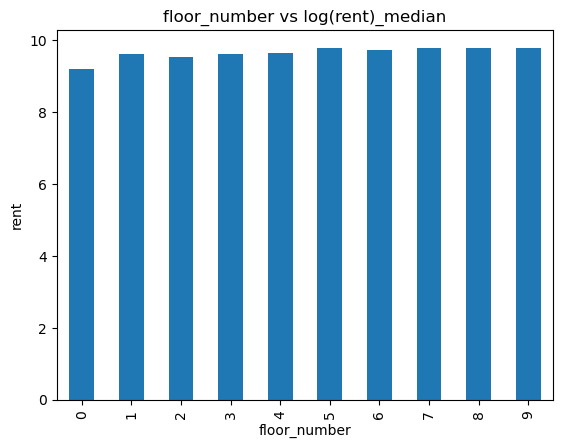

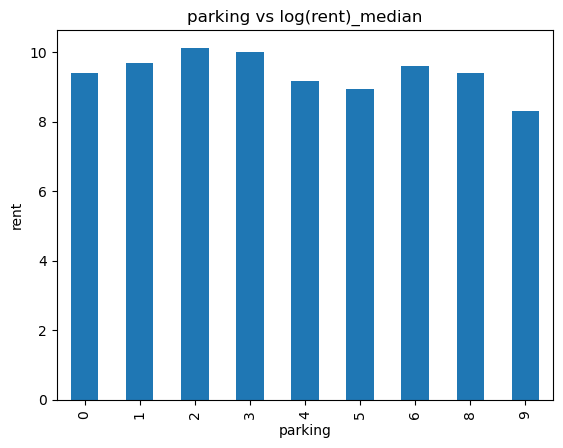

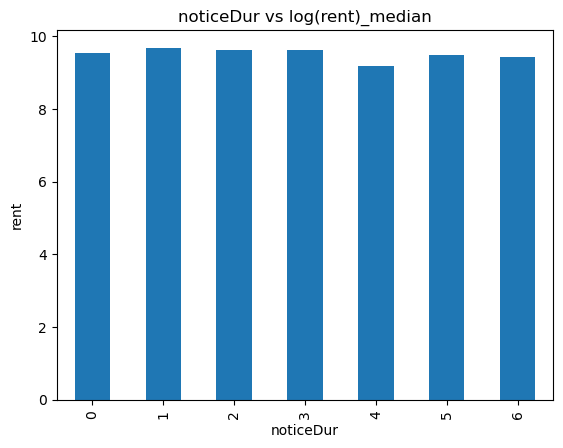

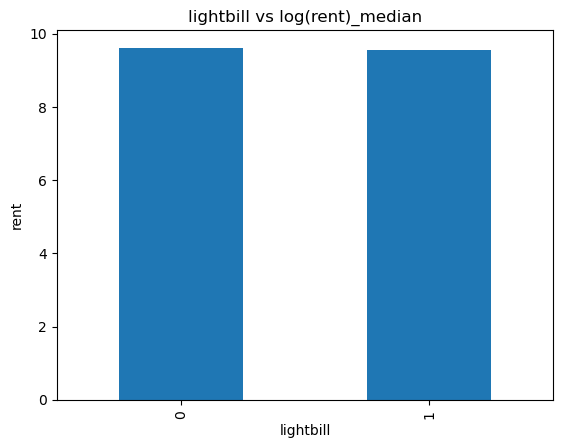

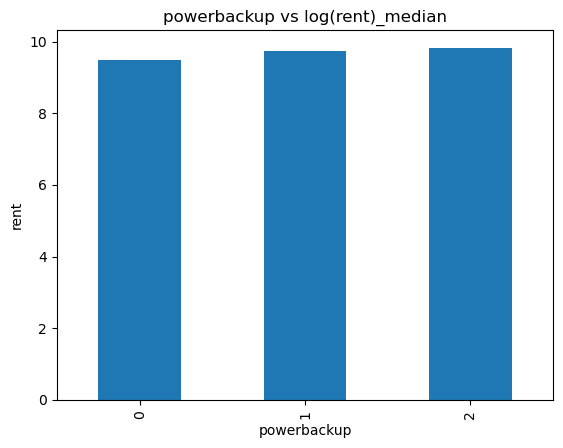

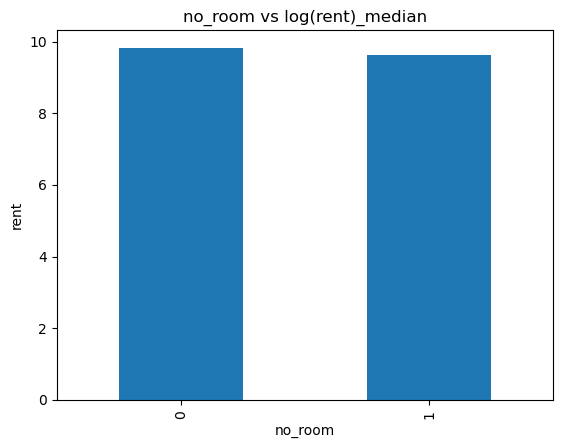

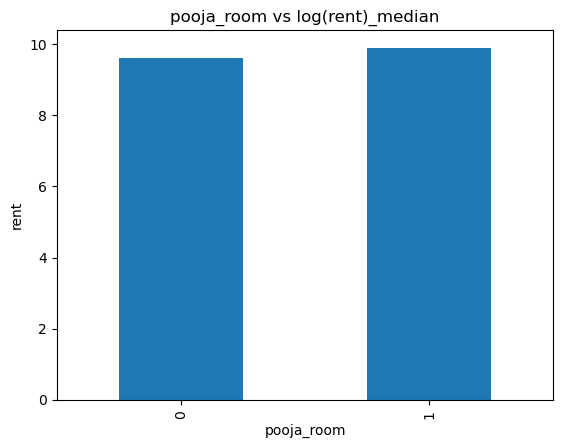

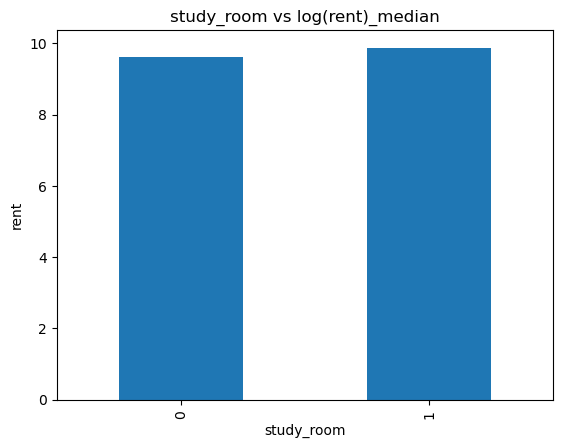

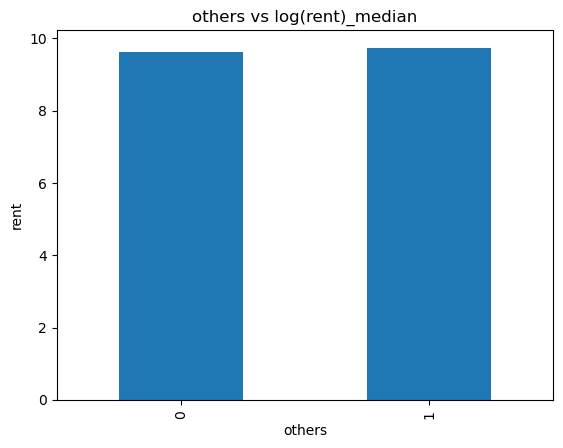

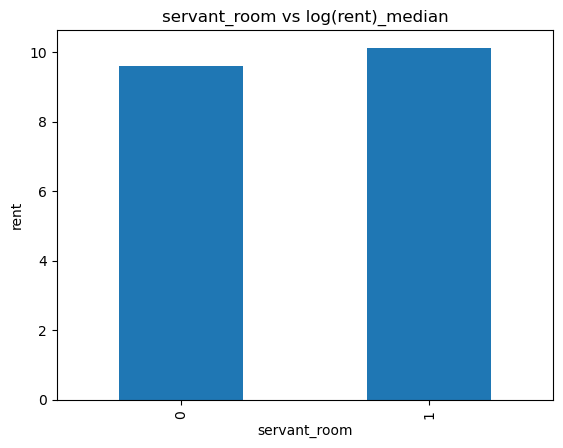

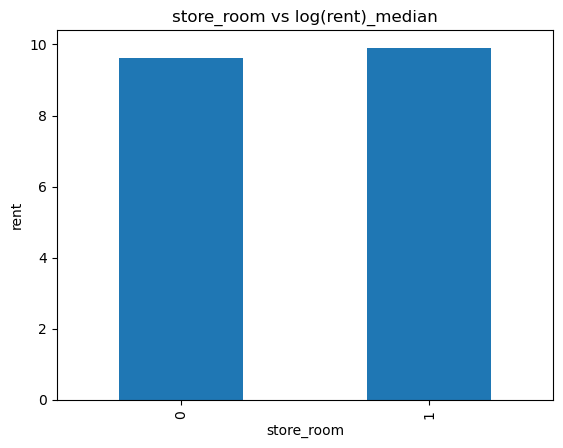

In [13]:
for feature in dis_features:
    df.groupby(feature)[target].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title('{} vs log({})_median'.format(feature, target))
    plt.show()

### Continuous Features

In [14]:
con_features = [feature for feature in num_features if feature not in dis_features and feature != target]

print(con_features)

['area', 'aggDur', 'brok_amt', 'deposit_amt', 'mnt_amt']


#### Distribution

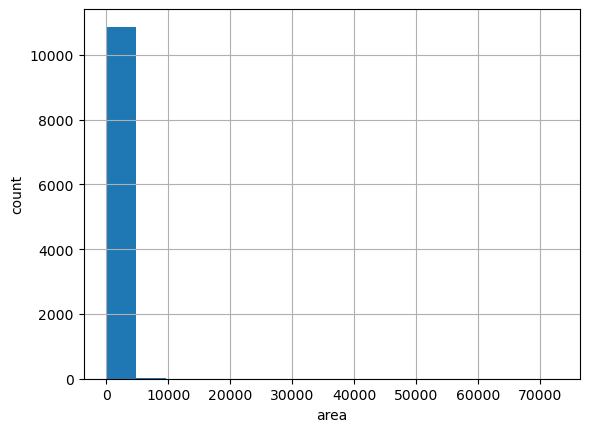

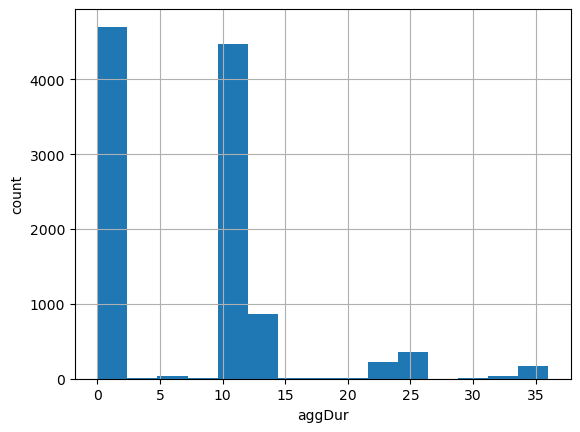

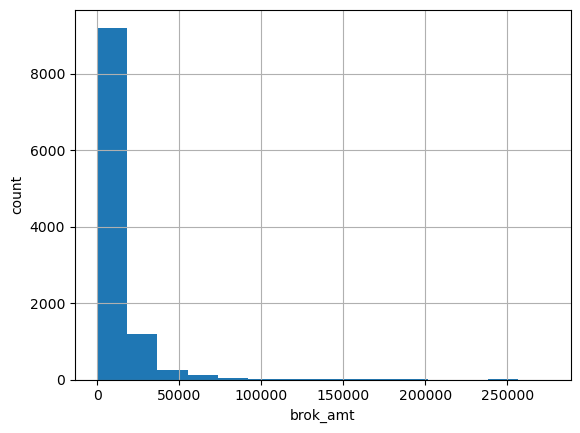

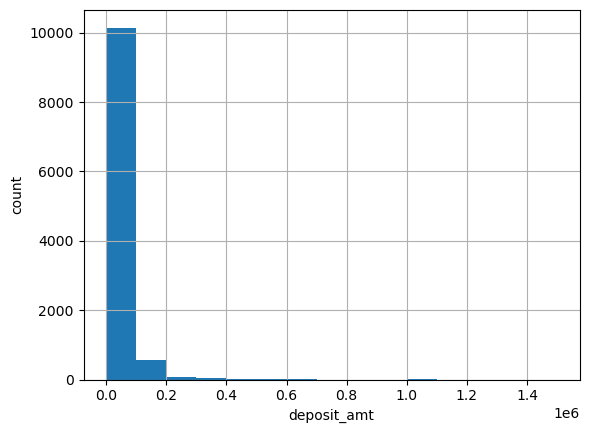

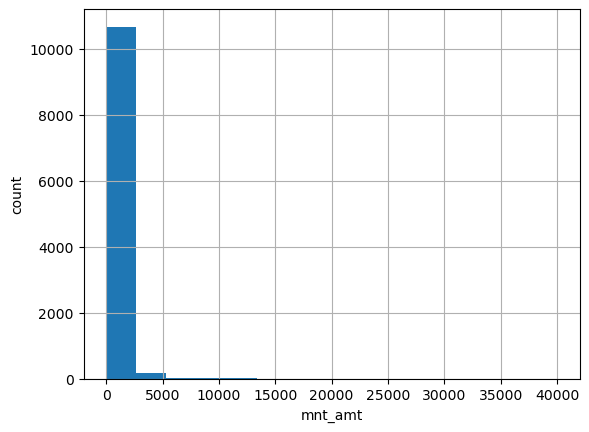

In [15]:
for feature in con_features:
    df[feature].hist(bins = 15)
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### Dealing with outliers

Values being replaced: 102


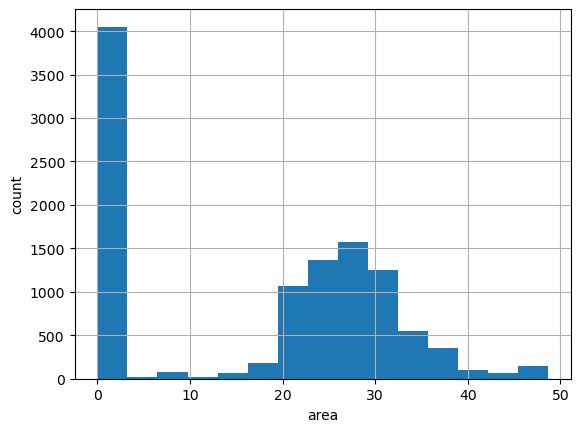

Values being replaced: 205


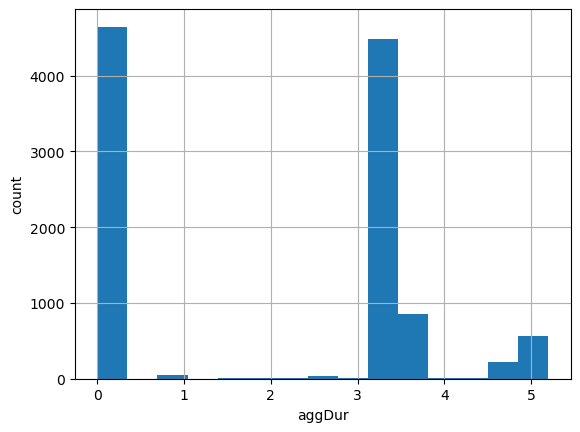

Values being replaced: 574


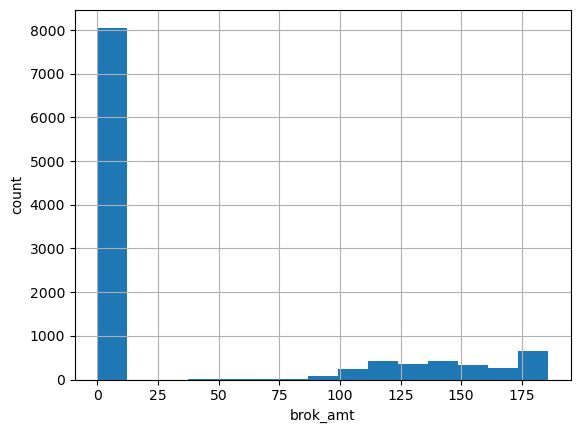

Values being replaced: 285


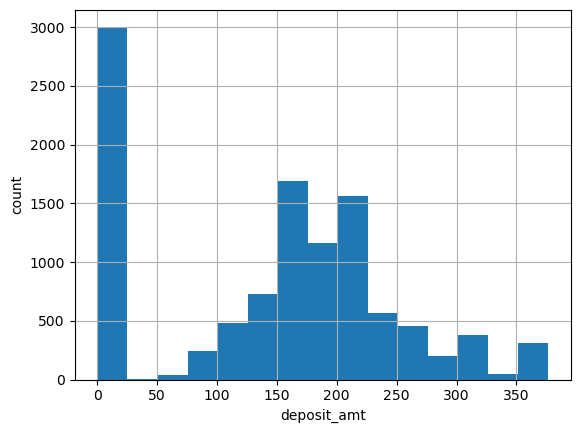

Values being replaced: 330


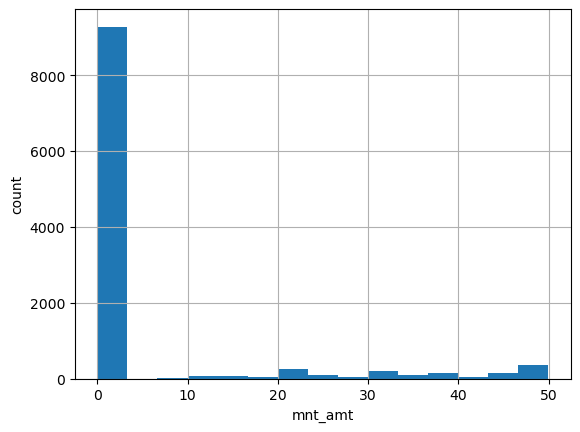

In [16]:
data = df.copy()

for feature in con_features:
    
    extreme = int(data[feature].median() + 2 * data[feature].std()) + 1
    print('Values being replaced: {}'.format(len(data.loc[data[feature] > extreme])))
    data[feature] = np.where(data[feature] > extreme, extreme, data[feature])
    data[feature] = data[feature] ** 0.5
    
    data[feature].hist(bins = 15)
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### vs Target Variable

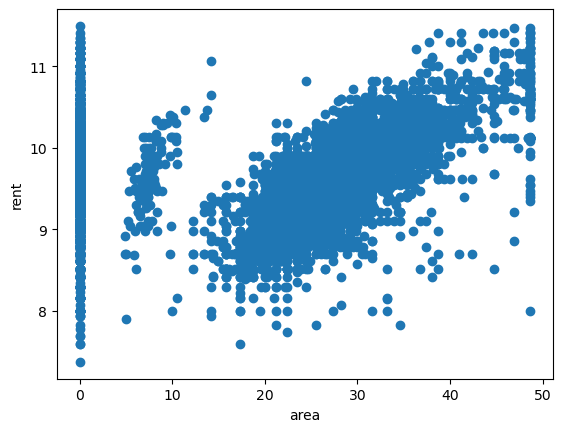

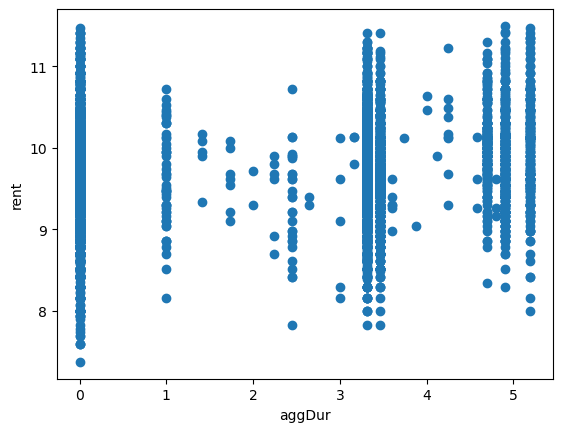

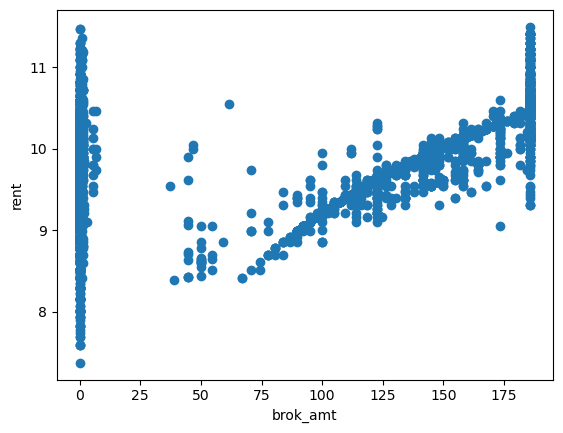

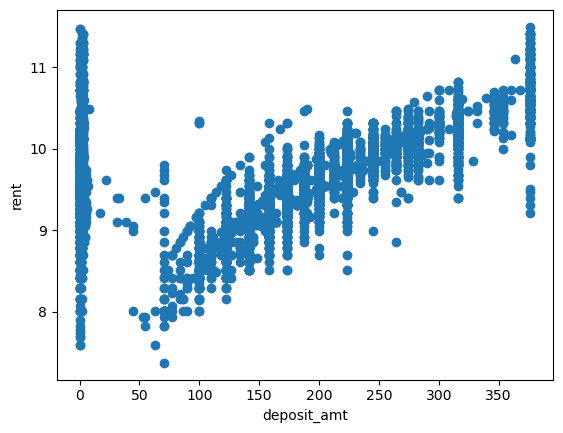

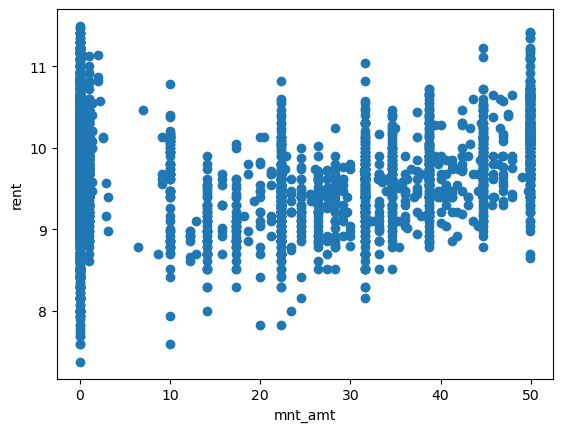

In [17]:
data = df.copy()

for feature in con_features:
    
    extreme = int(data[feature].median() + 2 * data[feature].std()) + 1
    data[feature] = np.where(data[feature] > extreme, extreme, data[feature])
    data[feature] = data[feature] ** 0.5
    
    plt.scatter(data[feature], data[target])
    
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

## Categorical Features

In [18]:
cat_features = [feature for feature in df.columns if feature not in num_features and feature != target]

df[cat_features].head()

,furnishing,avalable_for,address,facing,floor_type,gate_community,corner_pro,wheelchairadption,petfacility,propertyage,maintenance_amt
0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",West,Marble,Yes,No,NaN,NaN,5 to 10 Year Old,0
1,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",East,Vitrified,Yes,Yes,NaN,NaN,1 to 5 Year Old,0
2,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",South-West,Vitrified,Yes,No,NaN,NaN,1 to 5 Year Old,Maintenance 1/ (/ month
3,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",East,Mosaic,Yes,No,NaN,NaN,10+ Year Old,0
4,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",South,Polished concrete,Yes,Yes,NaN,NaN,1 to 5 Year Old,0


In [19]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df[feature].unique())))

furnishing: 4 categories
avalable_for: 8 categories
address: 6387 categories
facing: 9 categories
floor_type: 15 categories
gate_community: 2 categories
corner_pro: 2 categories
wheelchairadption: 2 categories
petfacility: 2 categories
propertyage: 6 categories
maintenance_amt: 174 categories


### Encoding addresses by average rent in the area

In [20]:
area = list(df['address'].astype(str))

area_new = []

for a in area:
    area_new.append(a[a.find(',') + 1: a.find(',', a.find(',') + 1)])
    
area_new = np.array(area_new)

In [21]:
df['address'] = area_new
df['expo_rent'] = np.e ** df['rent']
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,expo_rent
0,2,2,1050.0,Unfurnished,All,Pingale Wasti,5,West,Marble,Yes,...,0,0,0,0,0,0,3,0.0,9.903488,20000.0
1,2,2,760.0,Unfurnished,All,Wagholi,5,East,Vitrified,Yes,...,0,0,0,0,0,0,40000,0.0,9.546813,14000.0
2,3,3,0.0,Semifurnished,All,Mahalunge,1,South-West,Vitrified,Yes,...,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,10.043206,22999.0
3,1,1,628.0,Furnished,Family Only,Wanowrie,3,East,Mosaic,Yes,...,0,0,0,0,0,0,40000,0.0,9.472705,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",Uruli Devachi,6,South,Polished concrete,Yes,...,0,0,0,0,0,0,20,0.0,8.922658,7500.0


In [22]:
area_mean = {}

for area in np.unique(area_new):
    area_mean[area] = df.loc[df['address'] == area]['expo_rent'].mean()
    
df['address_num'] = df['address'].map(area_mean)
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,expo_rent,address_num
0,2,2,1050.0,Unfurnished,All,Pingale Wasti,5,West,Marble,Yes,...,0,0,0,0,0,3,0.0,9.903488,20000.0,21700.000000
1,2,2,760.0,Unfurnished,All,Wagholi,5,East,Vitrified,Yes,...,0,0,0,0,0,40000,0.0,9.546813,14000.0,12649.223409
2,3,3,0.0,Semifurnished,All,Mahalunge,1,South-West,Vitrified,Yes,...,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,10.043206,22999.0,17396.448276
3,1,1,628.0,Furnished,Family Only,Wanowrie,3,East,Mosaic,Yes,...,0,0,0,0,0,40000,0.0,9.472705,13000.0,24577.586207
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",Uruli Devachi,6,South,Polished concrete,Yes,...,0,0,0,0,0,20,0.0,8.922658,7500.0,9400.000000


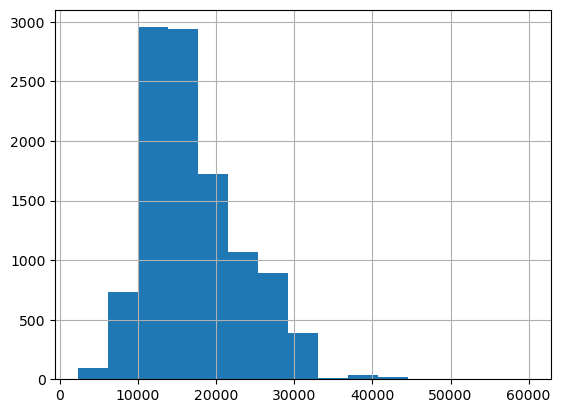

In [23]:
df['address_num'].hist(bins = 15)
plt.show()

In [24]:
df.drop(['address', 'expo_rent'], axis = 1, inplace = True)

### Dropping maintenance_amt 

In [25]:
df.drop(['maintenance_amt'], axis = 1, inplace = True)

In [26]:
cat_features.remove('address')
cat_features.remove('maintenance_amt')

### Distribution of categories

In [27]:
df['furnishing'] = np.where(df['furnishing'] == 'Unfurnishe', 'Unfurnished', df['furnishing'])
df['furnishing'].unique()

array(['Unfurnished', 'Semifurnished', 'Furnished'], dtype=object)

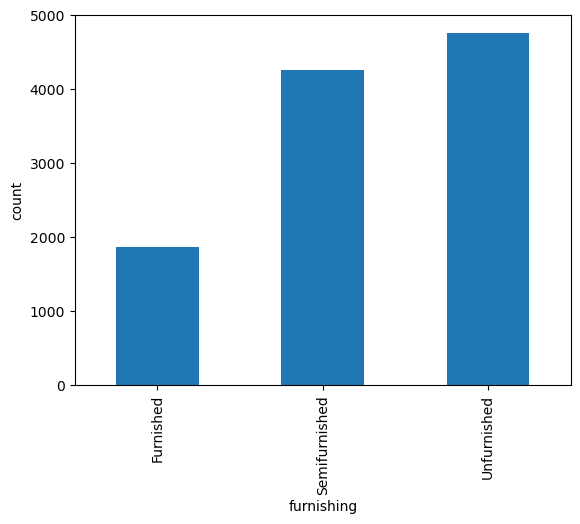

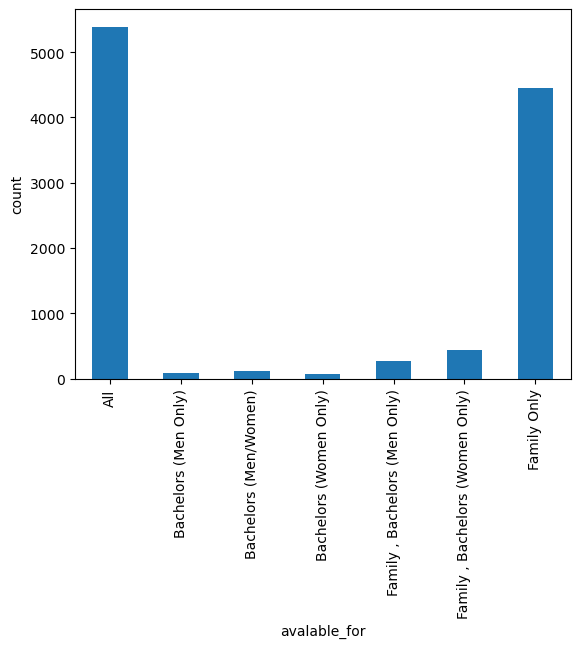

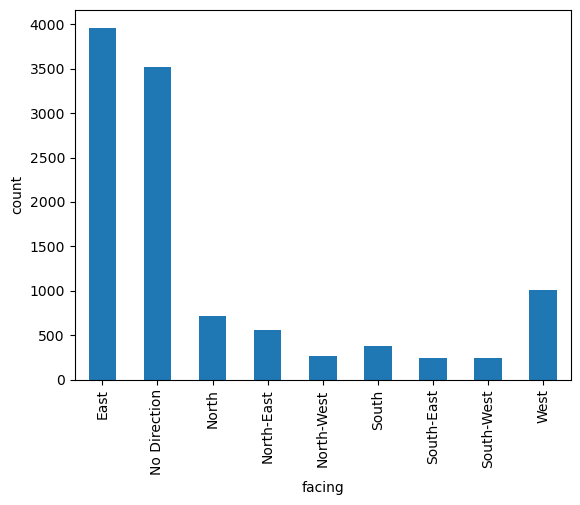

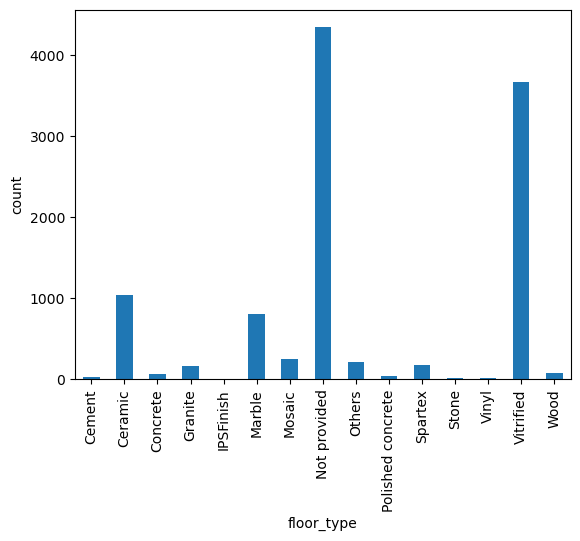

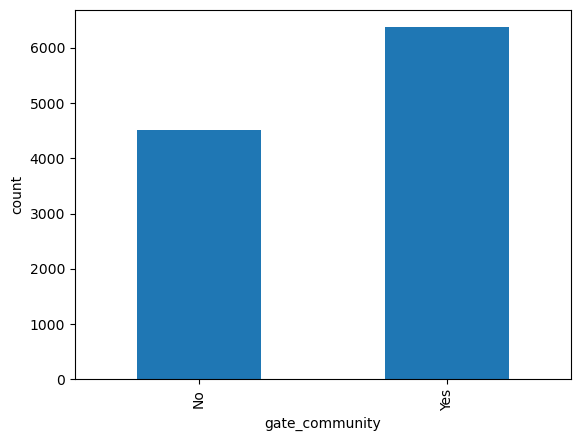

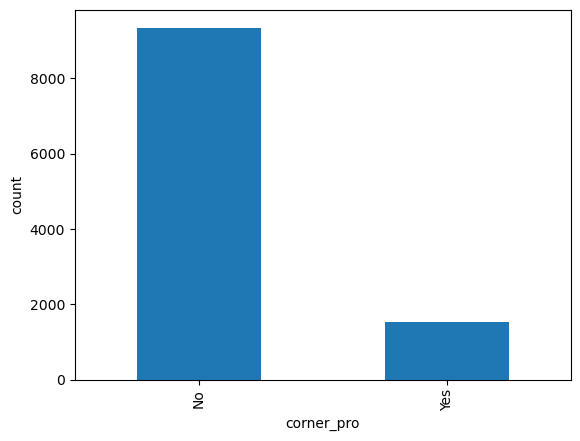

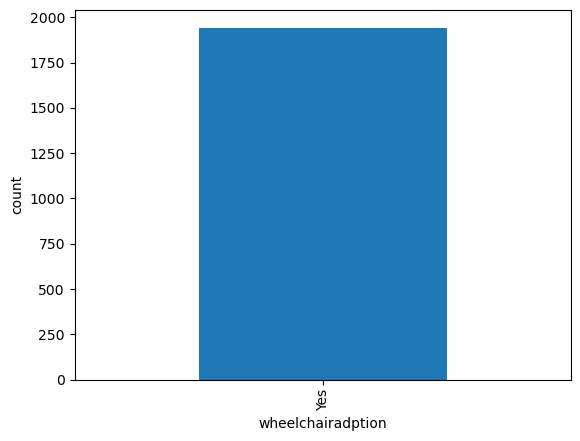

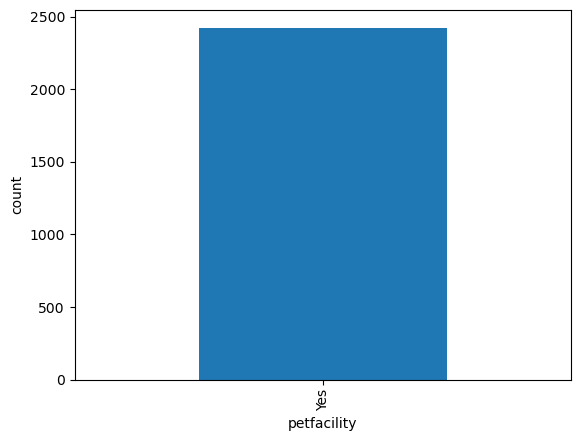

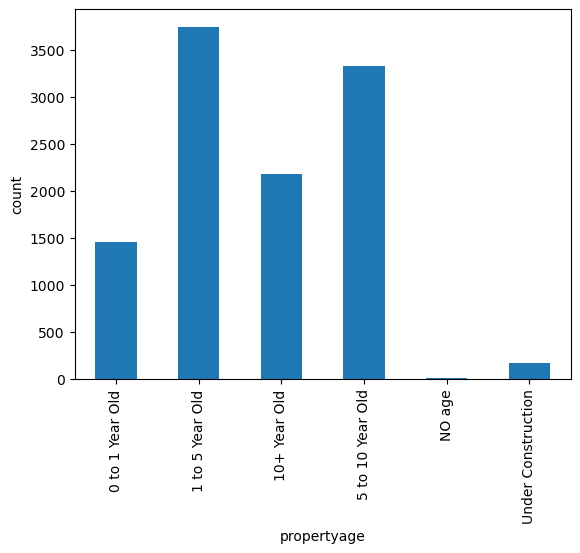

In [28]:
for feature in cat_features:
    df.groupby(feature)[target].count().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

### vs Target Variable

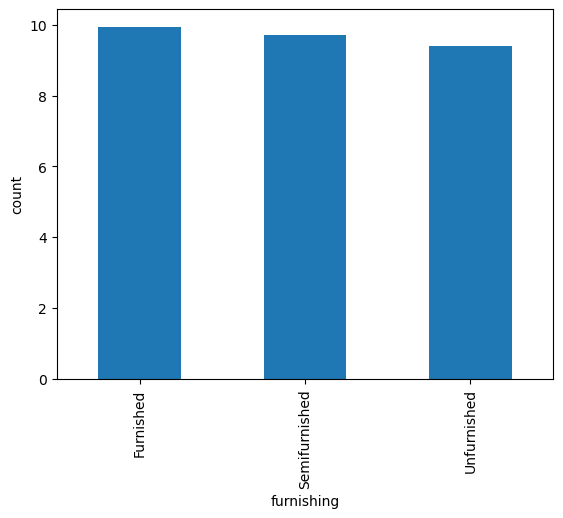

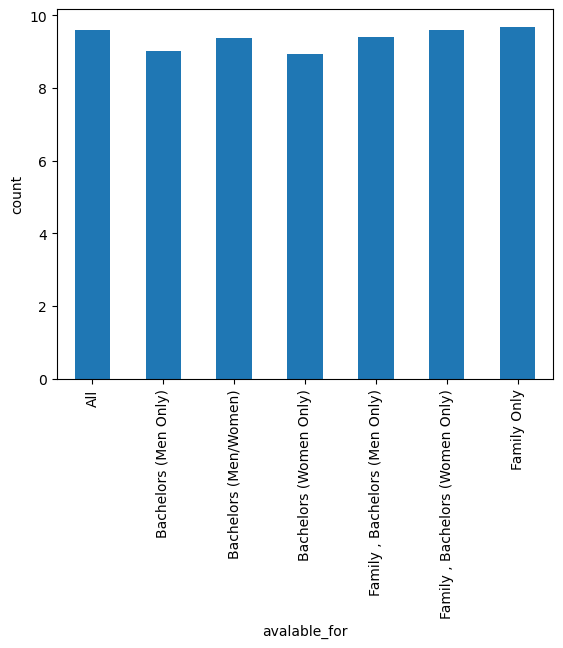

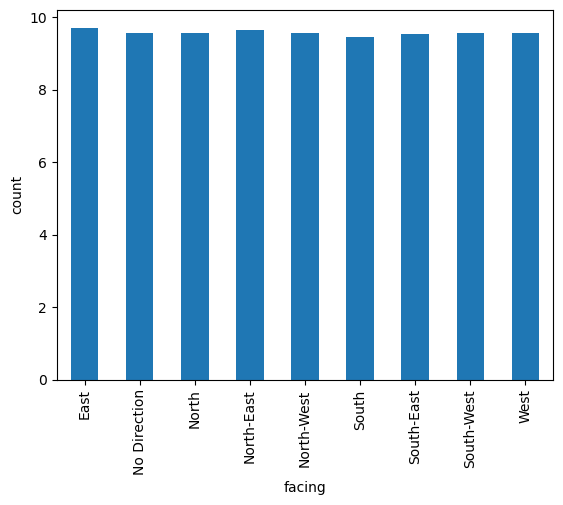

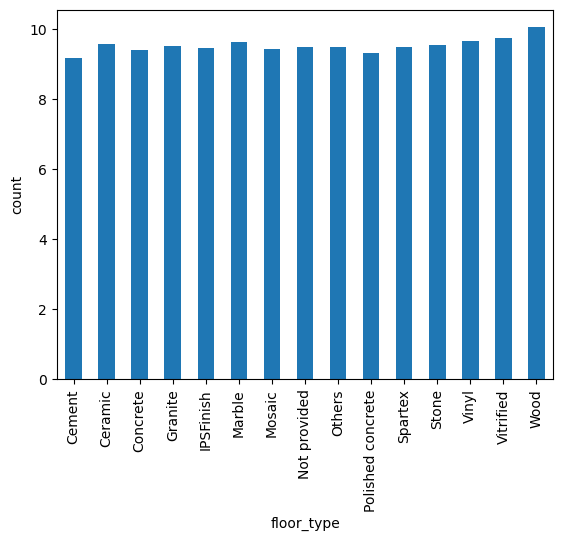

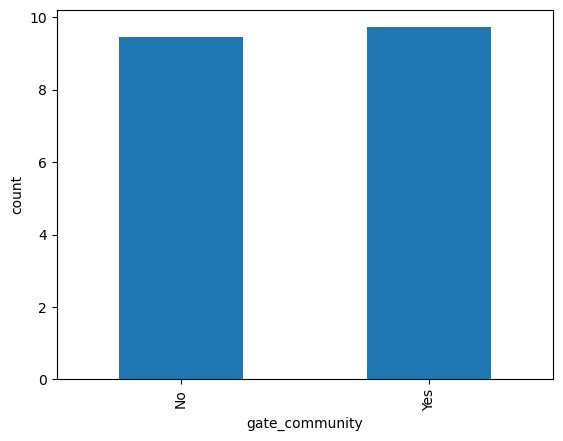

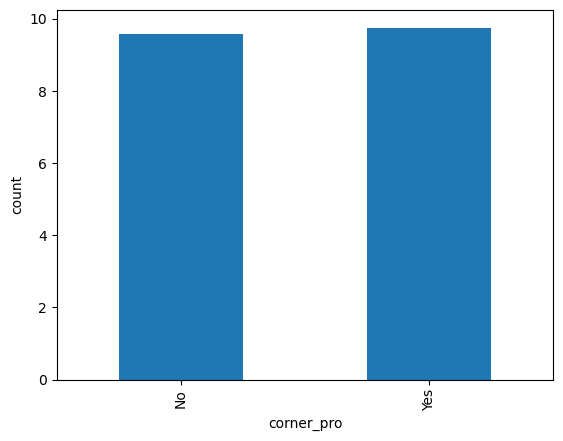

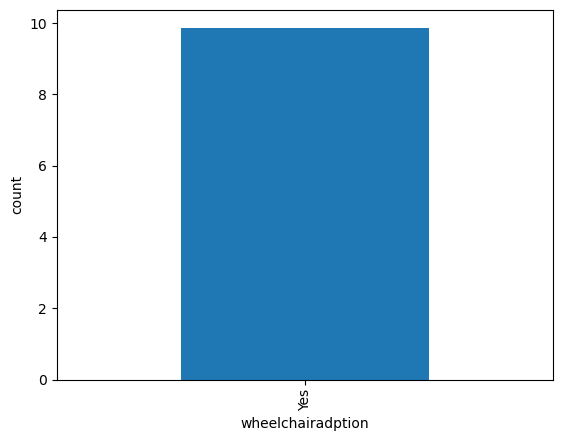

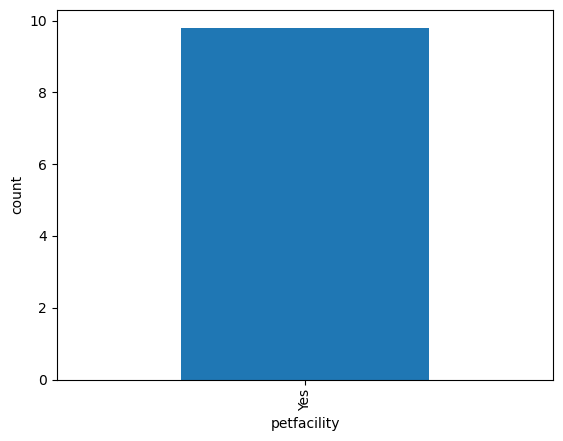

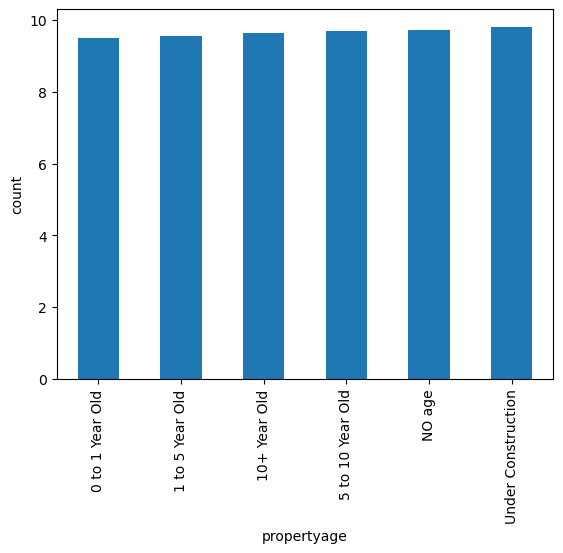

In [29]:
for feature in cat_features:
    df.groupby(feature)[target].mean().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

# Feature Engineering

In [30]:
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(10884, 30)


,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


## Dropping Rows

In [31]:
df.drop((df.loc[df['rent'] == max(df['rent'])]).index, inplace = True)

## Encoding address feature

In [32]:
area = list(df['address'].astype(str))

area_new = []

for a in area:
    area_new.append(a[a.find(',') + 1: a.find(',', a.find(',') + 1)])
    
df['address'] = np.array(area_new)

In [33]:
area_mean = {}

for area in np.unique(np.array(area_new)):
    area_mean[area] = df.loc[df['address'] == area]['rent'].mean()
    
df['address_num'] = df['address'].map(area_mean)

## Transformation of Numerical Features

In [34]:
## log transformation of target variable

df[target] = np.log(df[target])

In [35]:
## replacement of outliers and square root transformation of continuous features

for feature in con_features:
    
    extreme = int(df[feature].median() + 2 * df[feature].std()) + 1
    df[feature] = np.where(df[feature] > extreme, extreme, df[feature])
    df[feature] = df[feature] ** 0.5

## Dropping Features

In [36]:
df.drop(['maintenance_amt', 'address'], axis = 1, inplace = True)

## Encoding of Categorial Variables

In [37]:
dummy_df = pd.get_dummies(df, drop_first = True)

print(dummy_df.shape)
dummy_df.head()

(10883, 58)


,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,...,floor_type_Vinyl,floor_type_Vitrified,floor_type_Wood,gate_community_Yes,corner_pro_Yes,propertyage_1 to 5 Year Old,propertyage_10+ Year Old,propertyage_5 to 10 Year Old,propertyage_NO age,propertyage_Under Construction
0,2,2,32.403703,5,0,3.316625,2,0,2,1,...,False,False,False,True,False,False,False,True,False,False
1,2,2,27.568098,5,2,3.316625,1,0,2,1,...,False,True,False,True,True,True,False,False,False,False
2,3,3,0.000000,1,1,3.316625,1,0,2,0,...,False,True,False,True,False,True,False,False,False,False
3,1,1,25.059928,3,1,3.316625,1,0,0,1,...,False,False,False,True,False,False,True,False,False,False
4,2,2,25.845696,6,1,3.464102,1,1,1,1,...,False,False,False,True,True,True,False,False,False,False


In [38]:
dummy_df.to_csv('processed_data.csv', index = False)

# Feature Selection

In [39]:
df = pd.read_csv('processed_data.csv')

## Dropping using Correlation

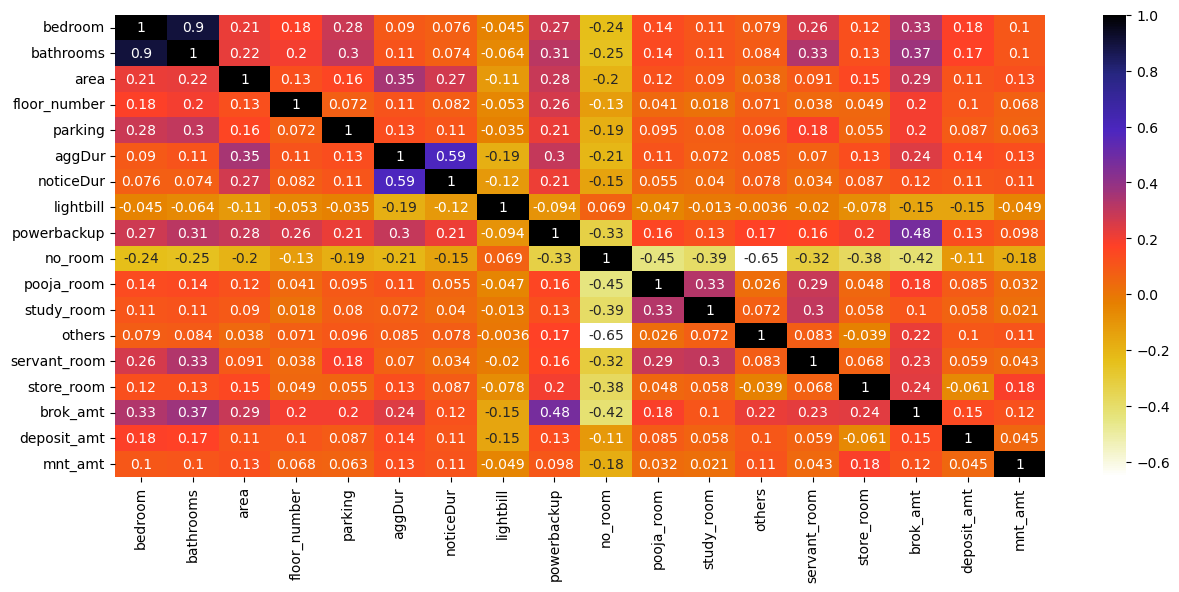

In [40]:
cor = df[num_features].corr()

plt.figure(figsize = (15, 6))
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

We can drop bedroom or bathrooms

In [41]:
df.drop(['bathrooms'], axis = 1, inplace = True)

## Selection using Lasso

In [42]:
X = df.drop(['rent'], axis = 1)
y = df['rent']

In [43]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

scaler.fit(X)

MinMaxScaler()

In [45]:
X_scaled = scaler.transform(X)

In [46]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(X_scaled, y)                                    

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [47]:
selected_features = X.columns[(feature_sel_model.get_support())]

print('total features:', X.shape[1])
print('selected features:', len(selected_features))
print('features with coefficients shrunk to 0:', np.sum(feature_sel_model.estimator_.coef_ == 0))

total features: 56
selected features: 15
features with coefficients shrunk to 0: 41


In [48]:
print('Selected Features:\n', selected_features)

Selected Features:
 Index(['bedroom', 'area', 'floor_number', 'powerbackup', 'no_room', 'brok_amt',
       'deposit_amt', 'address_num', 'furnishing_Semifurnished',
       'furnishing_Unfurnished', 'avalable_for_Family Only',
       'facing_No Direction', 'gate_community_Yes',
       'propertyage_1 to 5 Year Old', 'propertyage_10+ Year Old'],
      dtype='object')


In [49]:
X_lasso = X[selected_features]

# Models

In [50]:
X = X_lasso
y = df['rent']

## Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [54]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(scores))

0.6689453189144703


### Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(scores))

0.8338346943571455
